# Almond Classifier

Data is sourced from :https://www.kaggle.com/datasets/sohaibmoradi/almond-types-classification

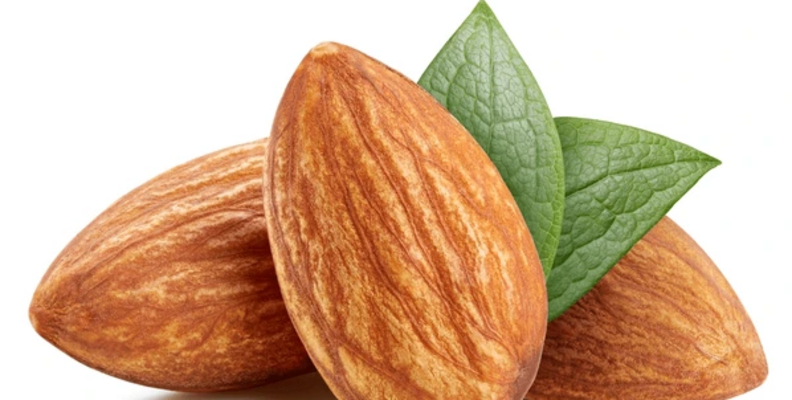

# Phase 1

Data loading, analysis and preprocessing

In [173]:
#Import necessaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from xgboost import XGBClassifier

#Instancing from 'SimpleImputer' and 'StandardScaler' objects
imputer = SimpleImputer()
scaler = StandardScaler()

In [174]:
#Data loading
file = pd.read_csv("D:\\datasets\\Almond\\Almond.csv")
df = file.copy()
df.sample(5)

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
1335,1335,362.660706,NaN,90.478806,23606.0,926.298551,0.228524,0.916631,2.892476,NaN,NaN,0.565278,25753.0,MAMRA
849,849,NaN,175.686890,102.257378,13914.5,478.232535,NaN,0.981069,1.307979,NaN,NaN,0.747448,14183.0,SANORA
397,397,264.853943,NaN,101.740959,20479.5,648.031524,0.371721,0.978359,1.631785,NaN,NaN,0.750990,20932.5,SANORA
2028,2028,NaN,155.846527,103.242210,12245.5,443.948264,NaN,0.975348,1.280791,NaN,NaN,0.782210,12555.0,REGULAR
310,310,NaN,206.624680,122.332367,17758.0,759.327988,NaN,0.834414,2.583776,NaN,NaN,0.719413,21282.0,MAMRA


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

Total number of samples is 2803

In [176]:
#Finding number of Null values in each column
df.isnull().sum()

Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [177]:
#Finding number of duplicated values in the entire dataframe
df.duplicated().sum()

0

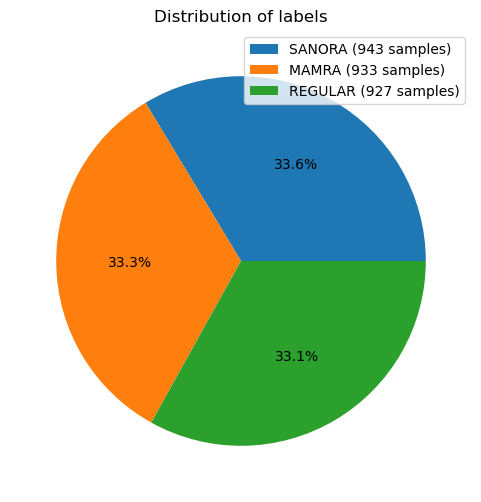

In [178]:
dfT = df.Type.value_counts().values
plt.figure(figsize=(6,6))
plt.pie(dfT,autopct='%1.1f%%')
plt.title('Distribution of labels')
plt.legend([f'SANORA ({dfT[0]} samples)',f'MAMRA ({dfT[1]} samples)',f'REGULAR ({dfT[2]} samples)'])
plt.show()

In [179]:
#Separating label column
label = df.Type

#Droping unnecessaries columns
#Percentage of Null values in 'Aspect Ratio' and 'Eccentricity' columns is over 60, so drop them.
df = df.drop(['Type','Aspect Ratio','Eccentricity','Unnamed: 0'],axis=1)

In [180]:
#Encoding labels
label_dict = {'SANORA':0,'MAMRA':1,'REGULAR':2}
encoded_label = np.array([label_dict[i] for i in label],dtype='int64')

In [181]:
#Filling Null values with mean of relevant column
imputed_df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [182]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       2803 non-null   float64
 1   Width (minor axis)        2803 non-null   float64
 2   Thickness (depth)         2803 non-null   float64
 3   Area                      2803 non-null   float64
 4   Perimeter                 2803 non-null   float64
 5   Roundness                 2803 non-null   float64
 6   Solidity                  2803 non-null   float64
 7   Compactness               2803 non-null   float64
 8   Extent                    2803 non-null   float64
 9   Convex hull(convex area)  2803 non-null   float64
dtypes: float64(10)
memory usage: 219.1 KB


In [183]:
imputed_df.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Extent,Convex hull(convex area)
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000
mean,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,0.724587,27696.218159
std,52.255001,24.374382,15.172405,13782.561344,230.632076,0.098873,0.039596,0.794058,0.047474,14237.347610
min,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,0.454538,6355.000000
25%,264.115860,160.297798,105.398388,16211.500000,571.730009,0.422593,0.944579,1.357398,0.701673,17088.500000
50%,290.609274,171.025915,109.705378,23440.500000,707.487369,0.470466,0.970422,1.576412,0.733720,24589.000000
75%,299.851761,180.152008,115.107212,33451.000000,878.896530,0.538321,0.981484,1.965953,0.757551,34863.250000
max,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,0.845813,90642.500000


In [184]:
#Analysis on each label
df_means = list()
imputed_df['class'] = label
for lbl in ['SANORA','MAMRA','REGULAR']:
    lst = []
    temp_df = imputed_df[imputed_df['class']==lbl]
    lst.append(lbl)
    for col in ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)',
       'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness', 'Extent',
       'Convex hull(convex area)']:
        lst.append(temp_df[col].mean())
    df_means.append(lst)

names = [f'{i} MEAN' for i in ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)','Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness', 'Extent','Convex hull(convex area)']]
names.insert(0,'Class')
df_means = pd.DataFrame(df_means,columns=names)
df_means

,Class,Length (major axis) MEAN,Width (minor axis) MEAN,Thickness (depth) MEAN,Area MEAN,Perimeter MEAN,Roundness MEAN,Solidity MEAN,Compactness MEAN,Extent MEAN,Convex hull(convex area) MEAN
0,SANORA,285.611487,177.035753,113.448903,27383.594380,736.371272,0.490541,0.964464,1.694014,0.729561,28361.940085
1,MAMRA,312.845769,171.387207,104.229676,27854.953912,806.454241,0.422984,0.937582,2.102145,0.707280,29593.051447
2,REGULAR,273.312903,164.548717,111.408384,24271.046926,688.490002,0.497833,0.965408,1.680014,0.736946,25109.895361


In [185]:
imputed_df = imputed_df.drop(['class'],axis=1)

In [186]:
#Scaling dataframe
scaled_df = pd.DataFrame(scaler.fit_transform(imputed_df),columns=imputed_df.columns)

In [187]:
scaled_df.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Extent,Convex hull(convex area)
count,2.803000e+03,2.803000e+03,2.803000e+03,2.803000e+03,2803.000000,2.803000e+03,2.803000e+03,2.803000e+03,2.803000e+03,2.803000e+03
mean,2.433539e-16,-3.650309e-16,7.604810e-16,2.027949e-17,0.000000,4.157296e-16,2.322002e-15,3.751706e-16,1.013975e-16,6.083848e-17
std,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00
min,-2.665752e+00,-3.404812e+00,-3.309960e+00,-1.485774e+00,-1.874750,-3.001528e+00,-5.987967e+00,-8.322847e-01,-5.689386e+00,-1.499228e+00
25%,-5.070929e-01,-4.402176e-01,-2.839206e-01,-7.474268e-01,-0.746490,-4.842697e-01,-2.841472e-01,-5.892751e-01,-4.827446e-01,-7.451957e-01
50%,0.000000e+00,0.000000e+00,9.367922e-16,-2.228298e-01,-0.157753,5.615389e-16,3.686447e-01,-3.134097e-01,1.924181e-01,-2.182831e-01
75%,1.769043e-01,3.744801e-01,3.560937e-01,5.036162e-01,0.585594,6.864108e-01,6.480631e-01,1.772470e-01,6.944804e-01,5.034864e-01
max,4.301661e+00,3.592276e+00,4.755521e+00,4.555183e+00,4.861785,2.294532e+00,9.361534e-01,9.868570e+00,2.553981e+00,4.421997e+00


In [188]:
#Splitting data into train and test sets
#96% of data is considered as train set
xtr , xts , ytr , yts = train_test_split(scaled_df.to_numpy(),encoded_label,test_size=0.04,random_state=42)

In [189]:
print('Train set size:',len(xtr),'samples')
print('Test set size:',len(xts),'samples')

Train set size: 2690 samples
Test set size: 113 samples


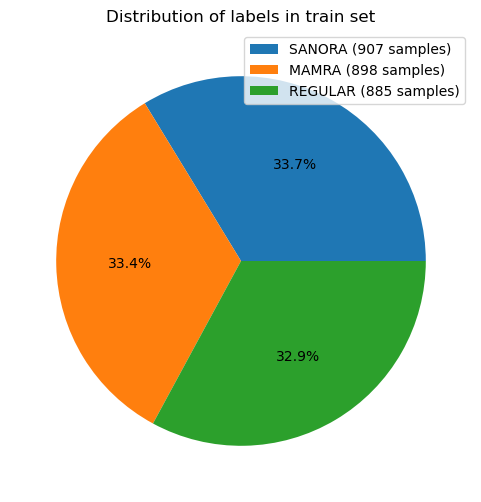

In [190]:
values = [ytr.tolist().count(i) for i in list(set(ytr.tolist()))]
plt.figure(figsize=(6,6))
plt.pie(values,autopct='%1.1f%%')
plt.title('Distribution of labels in train set')
plt.legend([f'SANORA ({values[0]} samples)',f'MAMRA ({values[1]} samples)',f'REGULAR ({values[2]} samples)'])
plt.show()

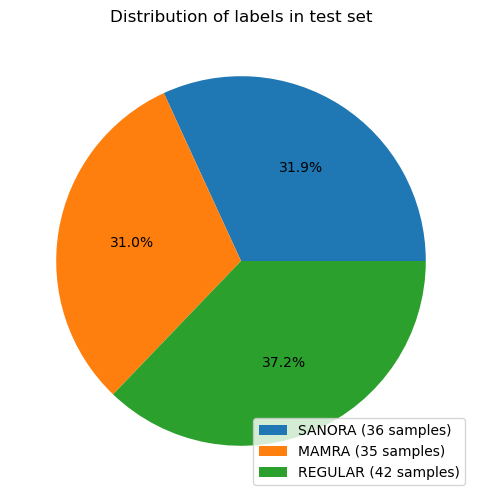

In [191]:
values = [yts.tolist().count(i) for i in list(set(yts.tolist()))]
plt.figure(figsize=(6,6))
plt.pie(values,autopct='%1.1f%%')
plt.title('Distribution of labels in test set')
plt.legend([f'SANORA ({values[0]} samples)',f'MAMRA ({values[1]} samples)',f'REGULAR ({values[2]} samples)'])
plt.show()

# Phase 2

Machine Learning and evaluating

In [192]:
#Create a model using XG boost classifier
model = XGBClassifier()

In [193]:
#Data train
model.fit(xtr,ytr)

#Calculating accuracy scores
print('Accuracy on train set:')
print(model.score(xtr,ytr)*100)
print()
print('Accuracy on test set:')
print(model.score(xts,yts)*100)
print()
model.fit(scaled_df.to_numpy(),encoded_label) #Data train on entire dataframe
print('Accuracy on the entire dataframe:')
print(model.score(scaled_df.to_numpy(),encoded_label)*100)

Accuracy on train set:
99.96282527881041

Accuracy on test set:
90.2654867256637

Accuracy on the entire dataframe:
100.0


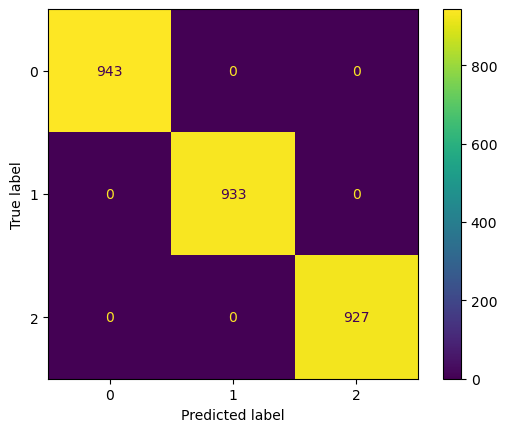

In [194]:
#Plotting confusion matrix
predicts = model.predict(scaled_df.to_numpy())
cm = confusion_matrix(encoded_label,predicts)
display = ConfusionMatrixDisplay(cm)
display.plot()

# End